# 导入相关依赖，定义工具函数

In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
TEST_SIZE=0.33
# 读入数据
def get_data_numpyArray(file_path):
    data = load_svmlight_file(file_path)
    return data[0].toarray(), data[1]


#将具有-1和1的标签数组转化为0和1的标签数组
def transform_ylable_from_posNe1_to_01(ylables):
    return np.array([int(y_item/2 + 0.5) for y_item in ylables])

#给数据集加一列1
def add_X_bColumn(X):
   b_train = np.ones(X.shape[0])
   return np.c_[X, b_train]


def svm_gradient(W, X, y, reg):
    dW = np.zeros(W.shape)    # initialize the gradient as zero
    # compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = X.shape[0]
    for i in range(num_train):
        #计算出x下标i的类别向量
        scores = X[i].dot(W)     # (1, C)
        #得到x下标i正确的类别向量，y[i]代表x下标i个数据是第y[i]个类
        #y[i]属于[0....类别的个数C]
        correct_class_score = scores[int(y[i])]
        #遍历每个类别，计算lost
        for j in range(num_classes):
            if j == y[i]:
                continue
            # 根据 SVM 损失函数计算
            margin = scores[j] - correct_class_score + 1    # note delta = 1
            # 当 margin>0 时，才会有损失，此时也会有梯度的累加
            if margin > 0:      # max(0, yi - yc + 1)
                 # 根据公式：∇Wyi Li = - xiT(∑j≠yi1(xiWj - xiWyi +1>0)) + 2λWyi
                 #虽然严格按照矩阵来讲列向量和行向量不能相加
                 #但是这里抽取某一行或者某一列，都是一纬的，可以进行
                dW[:, y[i]] += -X[i, :]   # y[i] 是正确的类
                #  根据公式： ∇Wj Li = xiT 1(xiWj - xiWyi +1>0) + 2λWj ,
                dW[:, j] += X[i, :]
    # 训练数据平均损失
    dW /= num_train
    #加上正则的偏导
    dW += 2 * reg * W
    return dW

def predict(W,X):
    y_pred = np.zeros(X.shape[1])
    scores = X.dot(W)
    y_pred = np.argmax(scores,axis=1)
    return y_pred


def compute_lost(X,y,W,reg):
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0
    # 对于每一个样本，累加loss
    for i in range(num_train):
        #计算出x下标i的类别向量
        scores = X[i].dot(W)     # (1, C)
        #得到x下标i正确的类别向量，y[i]代表x下标i个数据是第y[i]个类
        #y[i]属于[0....类别的个数C]
        correct_class_score = scores[int(y[i])]
        #遍历每个类别，计算lost
        for j in range(num_classes):
            if j == y[i]:
                continue
            # 根据 SVM 损失函数计算
            margin = scores[j] - correct_class_score + 1    # note delta = 1
            # 当 margin>0 时，才会有损失，此时也会有梯度的累加
            if margin > 0:      # max(0, yi - yc + 1)
                loss += margin
    # 训练数据平均损失
    loss /= num_train
    # 正则损失
    loss += reg * np.sum(W * W)
    return loss


def classify_f(X_train,y_train,X_test,y_test,W,numiter,alpha,reg):
    iterations=[]
    lost_y_train = []
    lost_y_test = []
    training_accuracy = []
    testing_accuracy = []
    for j in range(1,numiter+1):
        #计算梯度，更新W
        grad = svm_gradient(W,X_train,y_train,reg)
        W -= alpha * grad
        lost_train = compute_lost(X_train,y_train,W,reg)
        lost_test = compute_lost(X_test,y_test,W,reg)
        training_accuracy.append(np.mean(y_train==predict(W,X_train)))
        testing_accuracy.append(np.mean(y_test==predict(W,X_test)))
        iterations.append(j)
        lost_y_train.append(lost_train)
        lost_y_test.append(lost_test)
    return iterations,lost_y_train,lost_y_test,training_accuracy,testing_accuracy


# 加载数据集，进行预处理

In [2]:
X, y = get_data_numpyArray("australian_scale.txt")
X = add_X_bColumn(X)
y = transform_ylable_from_posNe1_to_01(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33)
#对权重进行初始化
W = np.random.randn(X_train.shape[1], 2) * 0.01
line_styles = [':','-','-.']

# 画出学习率和lost、学习率和准确率的对比图

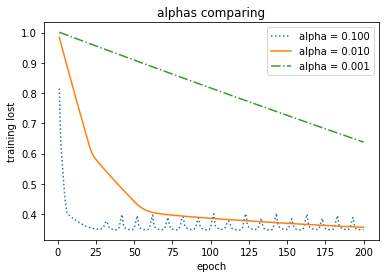

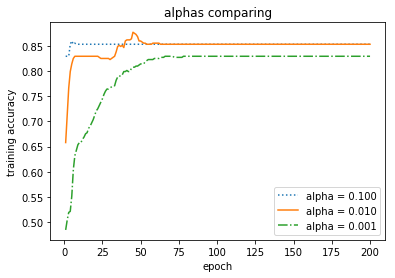

In [3]:
alphas = [0.1,0.01,0.001]
plt.figure(1)
plt.xlabel('epoch')
plt.ylabel('training lost')
plt.title('alphas comparing')
plt.figure(2)
plt.xlabel('epoch')
plt.ylabel('training accuracy')
plt.title('alphas comparing')
for alpha,line_style in zip(alphas,line_styles):
    iterations,lost_y_train,lost_y_test,training_accuracy,testing_accuracy = classify_f(X_train,y_train,X_test,y_test,W.copy(),200,alpha,0.1)
    plt.figure(1)
    plt.plot(iterations, lost_y_train, line_style,label='alpha = %.3f' % (alpha))
    plt.figure(2)
    plt.plot(iterations, training_accuracy,line_style,label='alpha = %.3f' % (alpha))
plt.legend()
plt.figure(1)
plt.legend()
plt.show()

# 画出训练集和测试集迭代次数的对比图

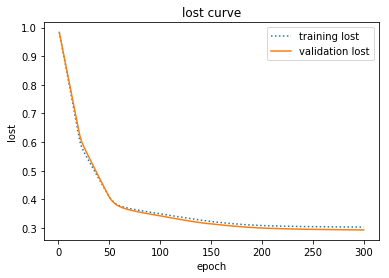

In [4]:
plt.figure(3)
plt.xlabel('epoch')
plt.ylabel('lost')
plt.title('lost curve')
iterations,lost_y_train,lost_y_test,training_accuracy,testing_accuracy = classify_f(X_train,y_train,X_test,y_test,W.copy(),300,0.01,0.01)
plt.plot(iterations, lost_y_train, line_styles[0], label='training lost')
plt.plot(iterations, lost_y_test,line_styles[1], label='validation lost')
plt.legend()
plt.show()

# 画出正则参数和lost、学习率和准确率的对比图

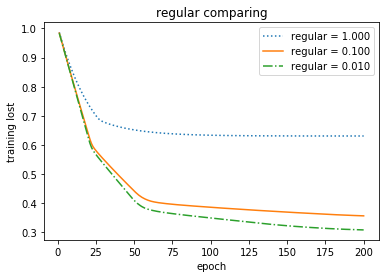

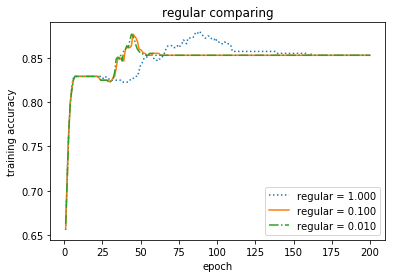

In [5]:
regulars = [1,0.1,0.01]
plt.figure(4)
plt.xlabel('epoch')
plt.ylabel('training lost')
plt.title('regular comparing')
plt.figure(5)
plt.xlabel('epoch')
plt.ylabel('training accuracy')
plt.title('regular comparing')
for regular,line_style in zip(regulars,line_styles):
    iterations,lost_y_train,lost_y_test,training_accuracy,testing_accuracy = classify_f(X_train,y_train,X_test,y_test,W.copy(),200,0.01,regular)
    plt.figure(4)
    plt.plot(iterations, lost_y_train, line_style,label='regular = %.3f' % (regular))
    plt.figure(5)
    plt.plot(iterations, training_accuracy,line_style,label='regular = %.3f' % (regular))
plt.legend()
plt.figure(4)
plt.legend()
plt.show()

# 画出最终的lost curve

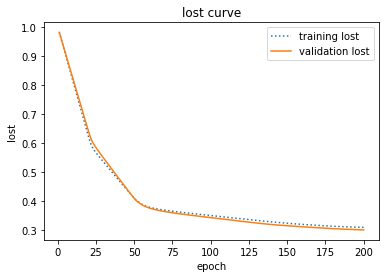

In [6]:
plt.figure(6)
plt.xlabel('epoch')
plt.ylabel('lost')
plt.title('lost curve')
iterations,lost_y_train,lost_y_test,training_accuracy,testing_accuracy = classify_f(X_train,y_train,X_test,y_test,W.copy(),200,0.01,0.01)
plt.plot(iterations, lost_y_train, line_styles[0], label='training lost')
plt.plot(iterations, lost_y_test,line_styles[1], label='validation lost')
plt.legend()
plt.show()